# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis

Temp are tightly correlated to the latitude. Humdidity, cloudiness and Wind speed is weakly correlated to the latitude.
Temp drops as latitudes go up on north hemisphere and it drops as latitides go down on south hemisphere (towards the poles on either side of equator). But one important observation is the slope of decay is higher in north than south hemisphere. This is because it is winter season in north and summer in south

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import os
from scipy.stats import linregress
from pprint import pprint

sys.path.append('../../')
#sys.path.append(os.path.dirname(os.path.abspath(__file__), '..')) //TODO
#sys.path.append('/c/Users/igrang/DATACLASS/python-api-challenge')
# Import API key
from api_keys import weather_api_key
print(sys)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

<module 'sys' (built-in)>


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=30)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=30)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities


30

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cities_new=[]
lat = []
temp = []
windspeed=[]
humidity=[]
cloudiness=[]
response = requests.get(query_url + city).json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.5982, 'lon': -124.1573},
 'dt': 1642967158,
 'id': 5563839,
 'main': {'feels_like': 17.4,
          'humidity': 49,
          'pressure': 1023,
          'temp': 18.24,
          'temp_max': 21.19,
          'temp_min': 16.48},
 'name': 'Fortuna',
 'sys': {'country': 'US',
         'id': 2040243,
         'sunrise': 1642952020,
         'sunset': 1642987383,
         'type': 2},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 216, 'gust': 1.86, 'speed': 1.01}}


In [4]:
# Loop through the list of cities and perform a request for data on each
i=0
for city in cities:
    i=i+1
    if (i % 60 == 0):
        time.sleep(60)
    print(f"City being querried is {city}")
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        windspeed.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        cities_new.append(city)
        print(f"City successfully querried is {city}")
    except Exception as e:
        print(f" we got {e} error")
        pass
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

City being querried is provideniya
City successfully querried is provideniya
City being querried is ushuaia
City successfully querried is ushuaia
City being querried is bluff
City successfully querried is bluff
City being querried is grand haven
City successfully querried is grand haven
City being querried is zhanakorgan
City successfully querried is zhanakorgan
City being querried is boulsa
City successfully querried is boulsa
City being querried is rikitea
City successfully querried is rikitea
City being querried is guerrero negro
City successfully querried is guerrero negro
City being querried is krasnoborsk
City successfully querried is krasnoborsk
City being querried is kidodi
City successfully querried is kidodi
City being querried is samusu
 we got 'coord' error
City being querried is ilulissat
City successfully querried is ilulissat
City being querried is coahuayana
City successfully querried is coahuayana
City being querried is vaini
City successfully querried is vaini
City be

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "city": cities_new,
    "lat": lat,
    "temp": temp,
    "humidity":humidity,
    "cloudiness":cloudiness,
    "windspeed":windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data


,city,lat,temp,humidity,cloudiness,windspeed
0,provideniya,64.3833,-14.40,97,100,3.36
1,ushuaia,-54.8000,14.81,51,75,2.57
2,bluff,-46.6000,12.11,65,97,1.49
3,grand haven,43.0631,-4.95,52,100,1.79
4,zhanakorgan,43.9098,-3.81,85,7,1.63
5,boulsa,12.6675,23.02,12,0,4.52
6,rikitea,-23.1203,25.82,74,96,7.11
7,guerrero negro,27.9769,18.83,42,56,2.54
8,krasnoborsk,61.5598,-11.17,93,100,2.99
9,kidodi,-7.6036,23.22,88,100,1.14


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data["humidity"].max()

100

In [7]:
#  Get the indices of cities that have humidity over 100%.
print(weather_data.loc[weather_data["humidity"] > 100])

Empty DataFrame
Columns: [city, lat, temp, humidity, cloudiness, windspeed]
Index: []


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data

,city,lat,temp,humidity,cloudiness,windspeed
0,provideniya,64.3833,-14.40,97,100,3.36
1,ushuaia,-54.8000,14.81,51,75,2.57
2,bluff,-46.6000,12.11,65,97,1.49
3,grand haven,43.0631,-4.95,52,100,1.79
4,zhanakorgan,43.9098,-3.81,85,7,1.63
5,boulsa,12.6675,23.02,12,0,4.52
6,rikitea,-23.1203,25.82,74,96,7.11
7,guerrero negro,27.9769,18.83,42,56,2.54
8,krasnoborsk,61.5598,-11.17,93,100,2.99
9,kidodi,-7.6036,23.22,88,100,1.14


In [9]:
#Check for rogue value
index_names = weather_data[ weather_data['humidity'] > 100 ].index
index_names  
# drop these row indexes
# from dataFrame
clean_city_data= weather_data.drop(index_names, inplace = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

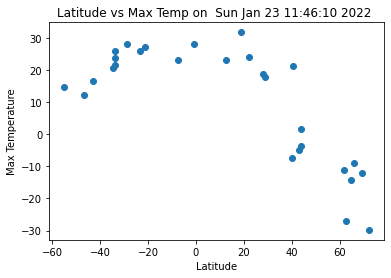

In [10]:
#plot and save file. Print UTC time 
x_values = clean_city_data['lat']
y_values = clean_city_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
currenttime=(time.asctime())
plt.title("Latitude vs Max Temp on  %s " % currenttime)
plt.savefig('Temp.png')
plt.show()


## Latitude vs. Humidity Plot

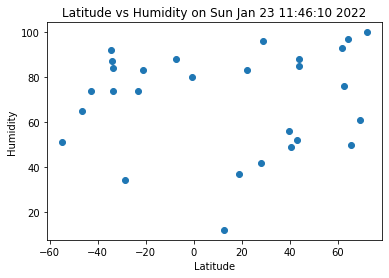

In [11]:
x_values = clean_city_data['lat']
y_values = clean_city_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity on %s" % currenttime)
plt.savefig('Humidity.png')
plt.show()


## Latitude vs. Cloudiness Plot

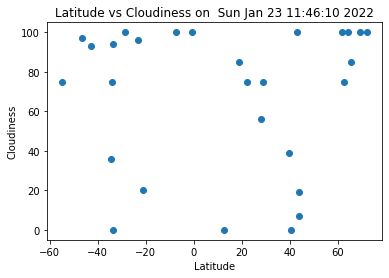

In [12]:
x_values = clean_city_data['lat']
y_values = clean_city_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness on  %s" % currenttime)
plt.savefig('Cloudiness.png')
plt.show()


## Latitude vs. Wind Speed Plot

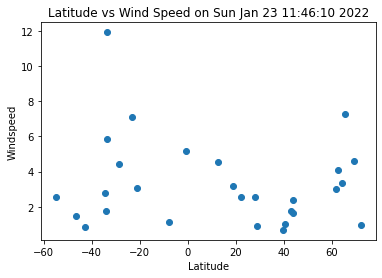

In [13]:
x_values = clean_city_data['lat']
y_values = clean_city_data['windspeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title("Latitude vs Wind Speed on %s" % currenttime)
plt.savefig('Windspeed.png')
plt.show()


## Linear Regression

In [14]:
index_names = clean_city_data[ clean_city_data['lat'] <0 ].index
# drop these row indexes
# from dataFrame
clean_city_data_north= clean_city_data.drop(index_names, inplace = False)
index_names = clean_city_data[ clean_city_data['lat'] >= 0 ].index
# drop these row indexes
# from dataFrame
clean_city_data_south= clean_city_data.drop(index_names, inplace = False)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

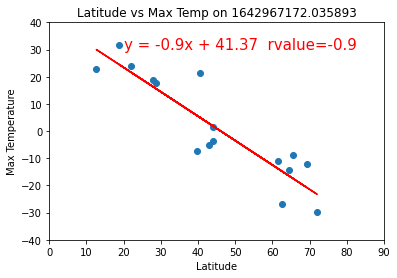

In [15]:
x_values = clean_city_data_north['lat']
y_values = clean_city_data_north['temp']
(slope,intercept,rvalue,d,e,) = linregress(x_values, y_values)
linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  rvalue=" +str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.xlim(0, 90)
plt.ylim(-40, 40)
currenttime=(time.time())
plt.title("Latitude vs Max Temp on %s" % currenttime)
plt.savefig('Temp_North.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

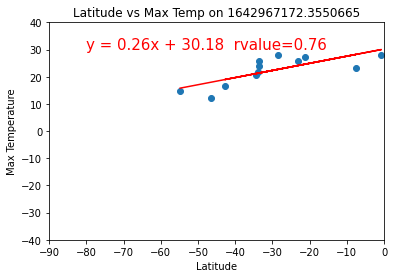

In [16]:
x_values = clean_city_data_south['lat']
y_values = clean_city_data_south['temp']
(slope,intercept,rvalue,d,e,) = linregress(x_values, y_values)
linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  rvalue=" +str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.xlim(-90, 0)
plt.ylim(-40, 40)
currenttime=(time.time())
plt.title("Latitude vs Max Temp on %s" % (currenttime))
plt.savefig('Temp_South.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

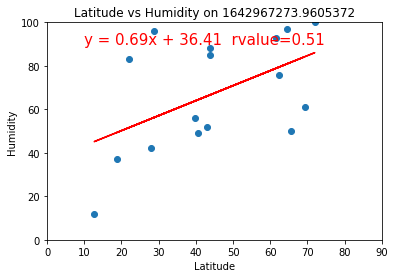

In [23]:
x_values = clean_city_data_north['lat']
y_values = clean_city_data_north['humidity']
(slope,intercept,rvalue,d,e,) = linregress(x_values, y_values)
linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  rvalue=" +str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(0, 90)
plt.ylim(0, 100)
currenttime=(time.time())
plt.title("Latitude vs Humidity on %s" % (currenttime))
plt.savefig('Humidity_North.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

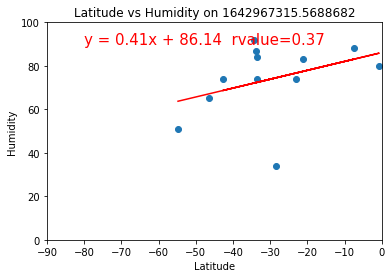

In [25]:
x_values = clean_city_data_south['lat']
y_values = clean_city_data_south['humidity']
(slope,intercept,rvalue,d,e,) = linregress(x_values, y_values)
linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  rvalue=" +str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(-90, 0)
plt.ylim(0, 100)
currenttime=(time.time())
plt.title("Latitude vs Humidity on %s" % (currenttime))
plt.savefig('Humidity_South.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

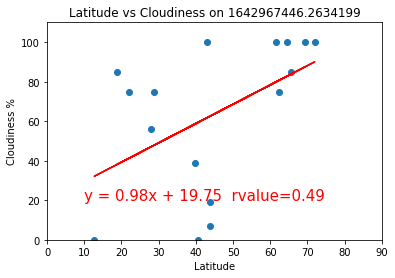

In [30]:
x_values = clean_city_data_north['lat']
y_values = clean_city_data_north['cloudiness']
(slope,intercept,rvalue,d,e,) = linregress(x_values, y_values)
linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  rvalue=" +str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.xlim(0, 90)
plt.ylim(0, 110)
currenttime=(time.time())
plt.title("Latitude vs Cloudiness on %s" % (currenttime))
plt.savefig('Cloudiness_North.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

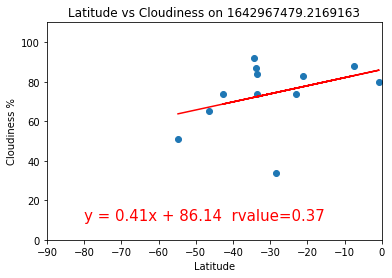

In [31]:
x_values = clean_city_data_south['lat']
y_values = clean_city_data_south['humidity']
(slope,intercept,rvalue,d,e,) = linregress(x_values, y_values)
linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  rvalue=" +str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.xlim(-90, 0)
plt.ylim(0, 110)
currenttime=(time.time())
plt.title("Latitude vs Cloudiness on %s" % (currenttime))
plt.savefig('Cloudiness_South.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

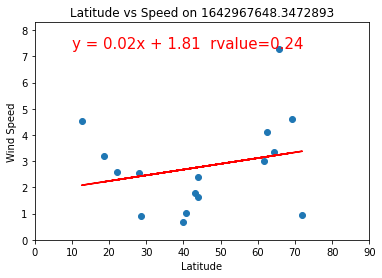

In [38]:
x_values = clean_city_data_north['lat']
y_values = clean_city_data_north['windspeed']
(slope,intercept,rvalue,d,e,) = linregress(x_values, y_values)
linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  rvalue=" +str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,y_values.max()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.xlim(0, 90)
plt.ylim(0, y_values.max()+1)
currenttime=(time.time())
plt.title("Latitude vs Speed on %s" % (currenttime))
plt.savefig('WindSpeed_North.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

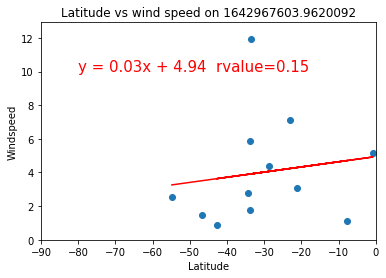

In [36]:
x_values = clean_city_data_south['lat']
y_values = clean_city_data_south['windspeed']
(slope,intercept,rvalue,d,e,) = linregress(x_values, y_values)
linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  rvalue=" +str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.xlim(-90, 0)
plt.ylim(0, y_values.max()+1)
currenttime=(time.time())
plt.title("Latitude vs wind speed on %s" % (currenttime))
plt.savefig('WindSpeed_South.png')
plt.show()